# Results

## Imports

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import json
import os
from google.colab import drive
import sys
import math

## Load Drive

In [ ]:
drive.mount('/content/gdrive/', force_remount=True)
personal_dir = "./gdrive/MyDrive/DeliverAI Data Folder/"

Mounted at /content/gdrive/


## Get Results

### Create General Results Table

In [ ]:
# Specify table columns here
cols = ['type', 'city', 'ratio', 'shares', 'success_rate', 'total_distance', 'total_distance_all', 'dist_sd', 'dist_sd_share', 'dist_sd_noshare', 'mean_time', 'time_sd', 'time_sd_share', 'time_sd_noshare', 'hops', 'CDV+PDV']

# Pass data to columns here
def make_row(data, t, city_name, ratio):
  global cols

  successful_distances = [d[0] for d in data['distances_tagged'] if d[2]]
  successful_times = [t[0] for t in data['times_tagged'] if t[2]]

  dist_sd_share = np.std([d[0] for d in data['distances_tagged'] if d[1]])
  dist_sd_noshare = np.std([d[0] for d in data['distances_tagged'] if not d[1]])
  time_sd_share = np.std([t[0] for t in data['times_tagged'] if t[1]])
  time_sd_noshare = np.std([t[0] for t in data['times_tagged'] if not t[1]])


  # Specify data for each row
  row_data = [
      t,  # type
      city_name,  # city
      ratio,  # super-spot : hotspot ratio
      data['shares'],
      round(data['success_rate'], 2),  # success rate decimal
      round(sum(successful_distances)/1000, 2),  # total distance traveled for successful deliveries
      round(sum(data['distances'])/1000, 2),  # total distance traveled
      round(np.std(data['distances'])/1000, 2),  # standard deviation of distances
      round(dist_sd_share/1000, 2),
      round(dist_sd_noshare/1000, 2),
      round(np.mean(data['times']), 2),  # mean time per delivery
      round(np.std(data['times']), 2),  # standard deviation of time per delivery
      round(time_sd_share, 2),
      round(time_sd_noshare, 2),
      data['hops'],  # average number of hops per successful delivery
      data['CDV'] + data['PDV'],  # CDV + PDV
  ]

  return dict(zip(cols, row_data))

cols_table = {k: [] for k in cols}

table = pd.DataFrame(columns=cols_table)

dir_list = list()
cities = ['Columbus', 'Philadelphia', 'Chicago']  # 'Columbus', 'Philadelphia', 'Chicago'
load = 300
ratios = [5, 10, 15]  # 5, 10, 15, 20, 30, 40
for city_name in cities:
  for ratio in ratios:
    subdir = f"{personal_dir}{city_name} - RL Delivery Data/Results/"
    supdir = f"Data-{ratio-3}-{ratio}/"
    dir = f"{subdir}{supdir}"

    if supdir[:-1] not in os.listdir(subdir):
      print(supdir, "not in", subdir)
    else:
      dir_list.append(dir)

      for f in os.listdir(dir):
        if ('result' in f or 'baseline1' in f or 'baseline2' in f):
          if int(f.split('-')[1]) == load:
            t = f.split('_')[0]
            data = json.load(open(dir+f))
            print(t, ratio, "\t", data.keys())

            row = make_row(data, t, city_name, ratio)
            table = pd.concat([table, pd.DataFrame([row])], ignore_index=True)
        else:
          print("Unrecognized file", f)

baseline2 5 	 dict_keys(['shares', 'success_rate', 'success_rate_grouped', 'description', 'sharing', 'distances', 'distances_tagged', 'times', 'times_tagged', 'wait', 'hops', 'hops_all', 'CDV', 'PDV', 'request_handler_performance'])


/usr/local/lib/python3.11/dist-packages/numpy/core/_methods.py:206: RuntimeWarning: Degrees of freedom <= 0 for slice
  ret = _var(a, axis=axis, dtype=dtype, out=out, ddof=ddof,
/usr/local/lib/python3.11/dist-packages/numpy/core/_methods.py:163: RuntimeWarning: invalid value encountered in divide
  arrmean = um.true_divide(arrmean, div, out=arrmean,
/usr/local/lib/python3.11/dist-packages/numpy/core/_methods.py:198: RuntimeWarning: invalid value encountered in scalar divide
  ret = ret.dtype.type(ret / rcount)
<ipython-input-3-59217ef99e42>:66: FutureWarning: The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.
  table = pd.concat([table, pd.DataFrame([row])], ignore_index=True)


baseline1 5 	 dict_keys(['shares', 'success_rate', 'success_rate_grouped', 'description', 'sharing', 'distances', 'distances_tagged', 'times', 'times_tagged', 'wait', 'hops', 'hops_all', 'CDV', 'PDV', 'request_handler_performance'])
results 5 	 dict_keys(['shares', 'success_rate', 'success_rate_grouped', 'description', 'sharing', 'distances', 'distances_tagged', 'times', 'times_tagged', 'wait', 'hops', 'hops_all', 'CDV', 'PDV', 'destination_success', 'source_success', 'order_rate', 'non_local_order_rate', 'request_handler_performance'])
Unrecognized file Repeating
baseline1 5 	 dict_keys(['shares', 'success_rate', 'success_rate_grouped', 'description', 'sharing', 'distances', 'distances_tagged', 'times', 'times_tagged', 'wait', 'hops', 'hops_all', 'CDV', 'PDV'])
results 5 	 dict_keys(['shares', 'success_rate', 'success_rate_grouped', 'description', 'sharing', 'distances', 'distances_tagged', 'times', 'times_tagged', 'wait', 'hops', 'hops_all', 'CDV', 'PDV', 'destination_success', 'sour

In [ ]:
table["ratio"] = pd.to_numeric(table["ratio"])
# table.sort_values(by=['city', 'ratio', 'type'])[['type', 'city', 'ratio', 'success_rate', 'total_distance_all', 'dist_sd']]
table[table['type'] == 'results'].sort_values(by=['success_rate'])

,type,city,ratio,shares,success_rate,total_distance,total_distance_all,dist_sd,dist_sd_share,dist_sd_noshare,mean_time,time_sd,time_sd_share,time_sd_noshare,hops,CDV+PDV
16,results,Columbus,5,1068,0.58,135715.43,273136.42,11.33,18.67,8.02,1673.80,868.37,852.42,429.20,3.098683,8035
87,results,Chicago,10,3,0.71,173020.31,256078.63,10.42,1.21,10.42,1498.02,649.29,82.10,649.09,3.000405,9379
31,results,Columbus,10,11601,0.76,222769.12,296873.62,14.99,15.13,12.16,2754.89,1030.19,961.42,723.29,5.277962,10181
28,results,Columbus,10,11657,0.76,225796.73,300306.79,15.06,15.22,12.04,2774.60,1040.54,973.69,722.61,5.288345,10227
27,results,Columbus,10,11740,0.76,224038.22,298793.01,15.08,15.20,12.24,2772.62,1038.23,971.00,742.64,5.295625,10390
26,results,Columbus,10,11705,0.76,223877.51,299499.58,15.01,15.13,12.48,2772.38,1041.77,979.36,747.80,5.291258,10240
25,results,Columbus,10,11767,0.76,223191.29,298405.48,15.09,15.23,12.07,2771.02,1037.83,966.08,731.82,5.301685,10321
24,results,Columbus,10,11720,0.76,225838.16,299658.92,15.21,15.37,12.03,2778.97,1033.51,969.88,719.22,5.302655,10282
29,results,Columbus,10,11700,0.76,224772.23,297634.18,15.13,15.28,12.20,2768.78,1034.93,973.78,734.33,5.305064,10299
30,results,Columbus,10,11620,0.77,228143.72,300611.41,15.25,15.39,12.18,2783.23,1038.26,973.36,722.25,5.312653,10351


### Create Load Results Table

In [ ]:
import os
import json
import pandas as pd
import numpy as np

data_dir = dir_list[2]

cols = ['t', 'load', 'success_rate', 'total_distance', 'total_distance_all',
        'mean_time', 'sd_time', 'shares', 'hops', 'CDV+PDV']

data_rows = []
for f in os.listdir(data_dir):
    file_path = os.path.join(data_dir, f)
    with open(file_path, 'r') as file:
        data = json.load(file)  # Load JSON data

    t = f.split('_')[0]
    l = int(f.split('-')[1])

    row_data = [
        t,
        l,
        data['success_rate'],               # success rate decimal
        data['total_distance'],            # total distance traveled
        data['total_distance_all'],        # total distance including all vehicles
        data['mean_time'],                 # mean time per delivery
        np.std(data['times']),             # standard deviation of time per delivery
        data['shares'],
        data['hops'],                      # average number of hops per delivery
        data['CDV'] + data['PDV'],         # CDV + PDV combined
    ]
    data_rows.append(row_data)

load_table = pd.DataFrame(data_rows, columns=cols)

KeyError: 'total_distance'

In [ ]:
load_table.sort_values(by=['total_distance_all'])

,t,load,success_rate,total_distance,total_distance_all,mean_time,sd_time,shares,hops,CDV+PDV
2,results,300,0.951969,255208.903214,274690.837095,1618.55,819.317266,1407,3.270000,8036
0,baseline1,300,0.984062,271743.004124,277296.393095,1428.21,436.220694,0,3.000000,8122
1,baseline2,300,0.970936,277000.601240,291017.730095,1533.98,664.095231,0,3.222016,8122
3,results,350,0.936782,284206.084351,317507.818310,1562.58,732.622652,1655,3.220000,9119
4,baseline1,350,0.984365,315193.623736,321220.711310,1423.60,437.219575,0,3.000000,9273
5,baseline2,350,0.971203,320388.022829,336540.892310,1524.00,658.589315,0,3.213986,9273
6,results,400,0.938426,327839.181772,365716.791543,1571.91,748.740329,2005,3.220000,10220
7,baseline1,400,0.986269,363081.281450,369067.443543,1427.28,438.182462,0,3.000000,10409
8,baseline2,400,0.971943,368862.663219,387273.221543,1528.73,662.119388,0,3.217865,10409
9,results,450,0.934816,367263.918759,410545.997719,1571.97,746.486950,2403,3.220000,11409


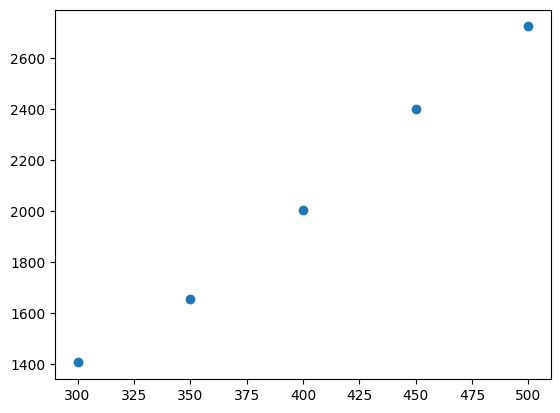

In [ ]:
fig, ax = plt.subplots()

ax.scatter(data=load_table[load_table['t'] == 'results'], x='load', y='shares')
# ax.xlabel('Load')
# ax.ylabel('Mean Time')

Text(0, 0.5, 'Success Rate')

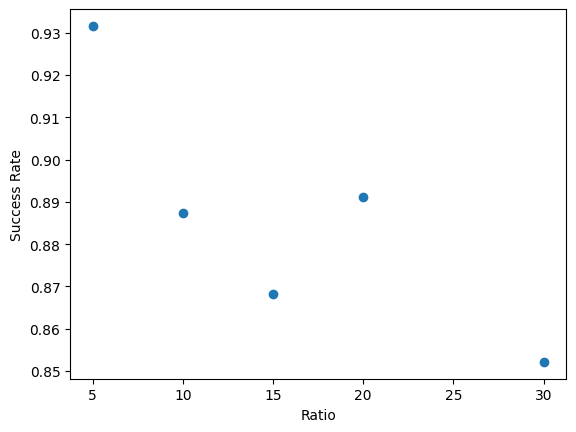

In [ ]:
result_table = table[table['type'] == 'results']

plt.scatter(data=result_table, x='ratio', y='success_rate')
plt.xlabel('Ratio')
plt.ylabel('Success Rate')
# plt.scatter(data=result_table, x='ratio', y='total_distance_all')

Text(0, 0.5, 'Total Distance')

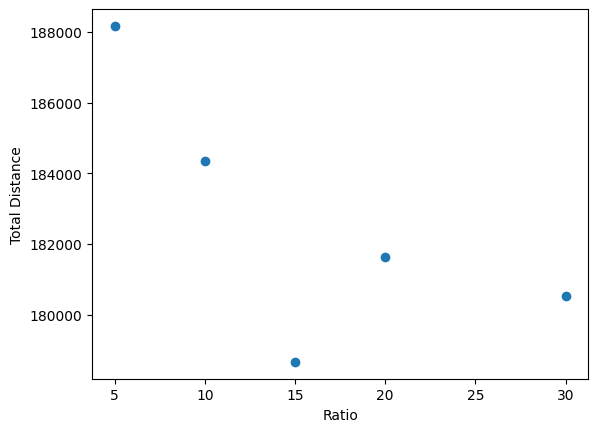

In [ ]:
plt.scatter(data=result_table, x='ratio', y='total_distance_all')
plt.xlabel('Ratio')
plt.ylabel('Total Distance')

### Check Sample Results

In [ ]:
# res_str = '0-0300-001-100'

columbus_res = json.load(open(dir_list[1] + 'results_0-0300-001-100_7_10.json'))
chicago_res = json.load(open(dir_list[-2] + 'results_0-0300-001-100_7_10.json'))
philadelphia_res = json.load(open(dir_list[4] + 'results_0-0300-001-100_7_10.json'))

# chicago_res['success_rate_grouped']

In [ ]:
def print_dict(d):
  for k, v in d.items():
    print(f"{k}: {v*100}%")
  print()

print_dict(columbus_res['success_rate_grouped'])

columbus_res['success_rate']

900: 93.35664335664336%
1200: 95.56213017751479%
1500: 98.03832116788321%
1800: 98.51992409867172%
2700: 98.1933690688902%
3600: 88.24884792626729%
5400: 99.14089347079039%
7200: 100.0%
10800: 0.0%
14400: 0.0%



0.9725948362902063

### Show Distance Saved via QuikDel

In [ ]:
## IMPORTANT! Shows the $dist saved by using our method, result dist / baseline1 dist
#  Show that more census tracts = better results?
for dir in dir_list:
  city = dir.split('/')[4].split(" ")[0]
  ratio = dir.split('/')[-2]

  ratio_L = ratio.split('-')[1]
  ratio_R = ratio.split('-')[2]

  data_res = json.load(open(dir+f"results_{res_str}_{ratio_L}_{ratio_R}.json"))
  data_bsl = json.load(open(dir+f"baseline1_{res_str}_{ratio_L}_{ratio_R}.json"))

  res_dist = data_res['total_distance_all']
  data_bsl = data_bsl['total_distance_all']

  print(city, ratio)
  print("\t", res_dist/data_bsl)
  print()

Columbus Data-2-5
	 0.986226621821972

Columbus Data-7-10
	 0.9918670443909771

Columbus Data-12-15
	 0.9906037147800006

Philadelphia Data-2-5
	 0.9504511636737708

Philadelphia Data-7-10
	 0.9280855069902909

Philadelphia Data-12-15
	 0.9122928868559639

Chicago Data-7-10
	 0.9183049458247154

Chicago Data-12-15
	 0.9445890836530639



In [ ]:
# Filter for 'results' and 'baseline1'
results_df = table[table['type'] == 'results']
baseline1_df = table[table['type'] == 'baseline1']

# Merge on city and ratio to match corresponding rows
merged_df = pd.merge(results_df, baseline1_df, on=['city', 'ratio'], suffixes=('_results', '_baseline1'))

# Calculate the ratio of total_distance
merged_df['total_distance_all_ratio'] = merged_df['total_distance_all_results'] / merged_df['total_distance_all_baseline1']

# Calculate the average distance ratio
average_ratio = merged_df['total_distance_all_ratio'].mean()

# Average per city
avg_per_city = merged_df.groupby('city')['total_distance_all_ratio'].mean().reset_index()

# Average per ratio
avg_per_ratio = merged_df.groupby('ratio')['total_distance_all_ratio'].mean().reset_index()

print(average_ratio)

# Print results
print("Average per City:")
print(avg_per_city)

print("\nAverage per Ratio:")
print(avg_per_ratio)


0.9528026209988443
Average per City:
           city  total_distance_all_ratio
0       Chicago                  0.931447
1      Columbus                  0.989566
2  Philadelphia                  0.930277

Average per Ratio:
   ratio  total_distance_all_ratio
0      5                  0.968339
1     10                  0.946086
2     15                  0.949162


\

## Other Graphs

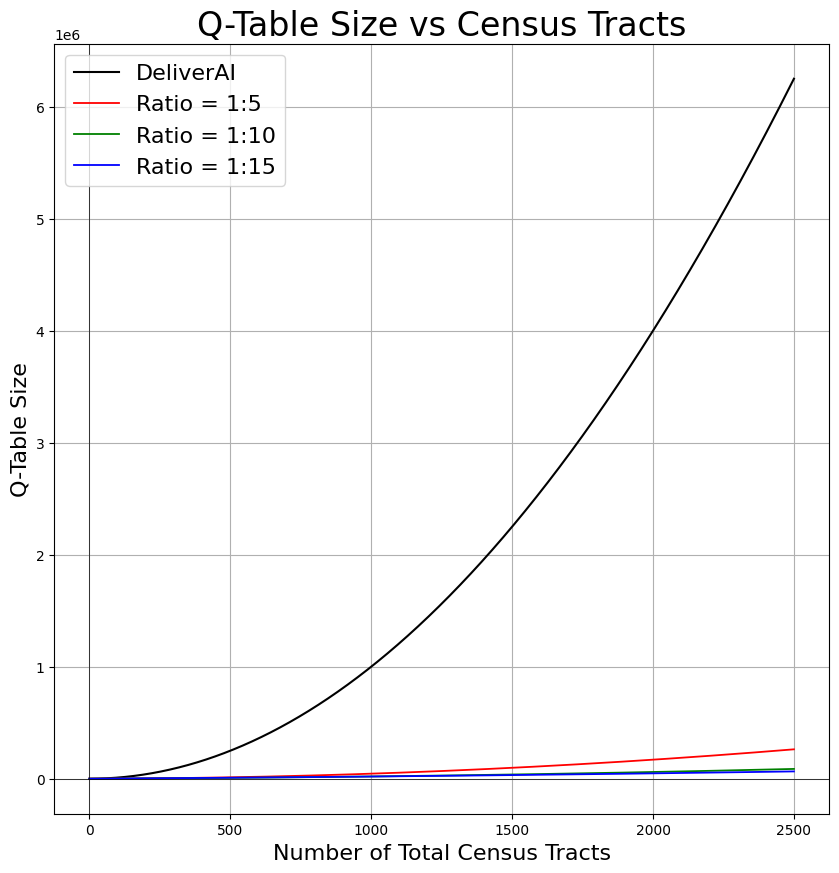

In [5]:

def curve_equation(x_vals, ratio):
  ret = []
  for x in x_vals:
    if ratio == 0:
      ret.append(x * x)
    else:
      ret.append((x/ratio)**2 + (x/ratio) * ratio**2)
  return ret

# Define the x values for the plot
x_values = np.linspace(0, 2500, 2500)

# Define different ratios to plot
ratios = [0, 5, 10, 15]
colors = ['black', 'red', 'green', 'blue']

# Plot the curves
plt.figure(figsize=(10, 10))

for ratio, color in zip(ratios, colors):
    y_values = curve_equation(x_values, ratio)
    if ratio != 0:
      plt.plot(x_values, y_values, label=f'Ratio = 1:{ratio}', color=color, linewidth=1.3)
    else:
      plt.plot(x_values, y_values, label=f'DeliverAI', color=color)




# Add labels, legend, and grid
plt.title("Q-Table Size vs Census Tracts", fontsize = 24)
plt.xlabel("Number of Total Census Tracts", fontsize = 16)
plt.ylabel("Q-Table Size", fontsize = 16)
plt.legend(fontsize=16, loc='upper left', frameon=True)
plt.grid(True)
plt.axhline(0, color='black', linewidth=0.5)
plt.axvline(0, color='black', linewidth=0.5)

# Show the plot
plt.show()

In [ ]:
import numpy as np

# Columbus Data
columbus_data = {
    "Success Rate (%)": [98.4, 99.1, 98.4],
    "Total Distance (km)": [271221, 273122, 271743],
    "Mean Time (s)": [1424.99, 1426.77, 1428.21],
    "SD Time (s)": [438.75, 435.67, 436.22],
    "Avg. Hops": [3.00, 3.00, 3.00],
    "Total Vehicles": [8109, 7992, 8122],
}

# Chicago Data
chicago_data = {
    "Success Rate (%)": [95.2, 95.2],
    "Total Distance (km)": [234285, 233317],
    "Mean Time (s)": [1416.62, 1406.64],
    "SD Time (s)": [581.20, 582.29],
    "Avg. Hops": [3.00, 3.00],
    "Total Vehicles": [9861, 9943],
}

# Chicago Subset Data
chicago_subset_data = {
    "Success Rate (%)": [100.0, 100.0, 100.0],
    "Total Distance (km)": [42492, 42568, 42644],
    "Mean Time (s)": [349.50, 350.43, 350.52],
    "SD Time (s)": [116.02, 115.87, 116.38],
    "Avg. Hops": [3.00, 3.00, 3.00],
    "Total Vehicles": [2397, 2504, 2494],
}

# Compute means for each dataset
columbus_avg = {key: np.mean(values) for key, values in columbus_data.items()}
chicago_avg = {key: np.mean(values) for key, values in chicago_data.items()}
chicago_subset_avg = {key: np.mean(values) for key, values in chicago_subset_data.items()}

columbus_avg, chicago_avg, chicago_subset_avg

({'Success Rate (%)': 98.63333333333333,
  'Total Distance (km)': 272028.6666666667,
  'Mean Time (s)': 1426.6566666666668,
  'SD Time (s)': 436.88000000000005,
  'Avg. Hops': 3.0,
  'Total Vehicles': 8074.333333333333},
 {'Success Rate (%)': 95.2,
  'Total Distance (km)': 233801.0,
  'Mean Time (s)': 1411.63,
  'SD Time (s)': 581.745,
  'Avg. Hops': 3.0,
  'Total Vehicles': 9902.0},
 {'Success Rate (%)': 100.0,
  'Total Distance (km)': 42568.0,
  'Mean Time (s)': 350.15000000000003,
  'SD Time (s)': 116.08999999999999,
  'Avg. Hops': 3.0,
  'Total Vehicles': 2465.0})

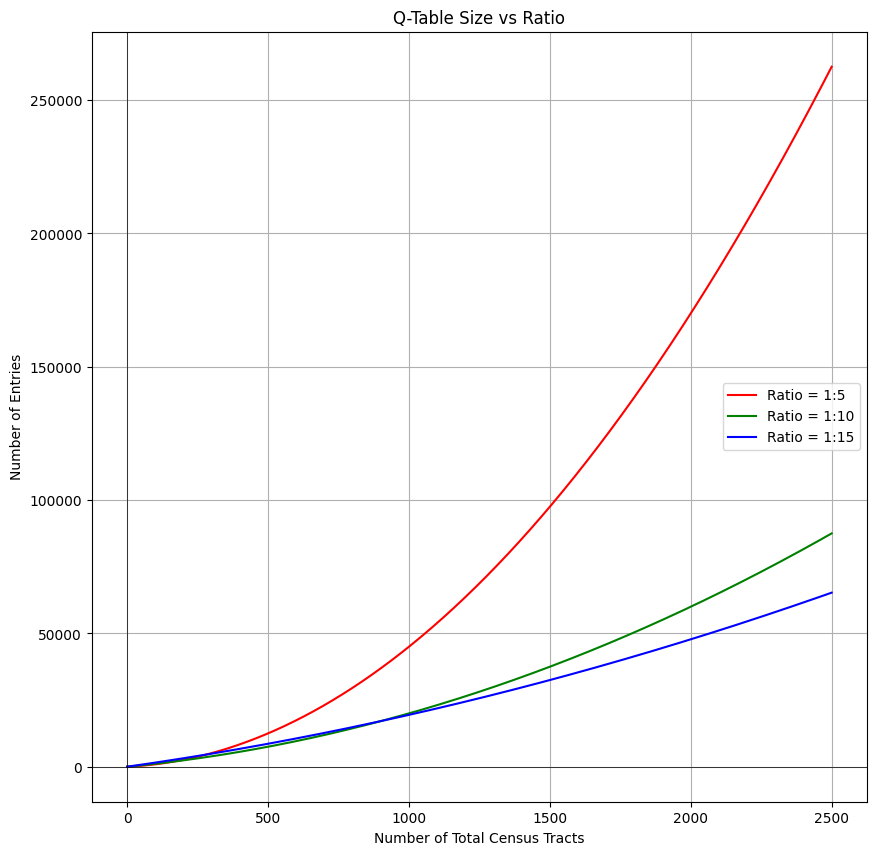

In [ ]:

def curve_equation(x_vals, ratio):
  ret = []
  for x in x_vals:
    if ratio == 0:
      ret.append(x * x)
    else:
      ret.append((x/ratio)**2 + (x/ratio) * ratio**2)
  return ret

# Define the x values for the plot
x_values = np.linspace(0, 2500, 2500)

# Define different ratios to plot
ratios = [5, 10, 15]
colors = ['red', 'green', 'blue', ]

# Plot the curves
plt.figure(figsize=(10, 10))

for ratio, color in zip(ratios, colors):
    y_values = curve_equation(x_values, ratio)
    if ratio != 0:
      plt.plot(x_values, y_values, label=f'Ratio = 1:{ratio}', color=color)
    else:
      plt.plot(x_values, y_values, label=f'No Super Spots - 1:X', color=color)




# Add labels, legend, and grid
plt.title("Q-Table Size vs Ratio")
plt.xlabel("Number of Total Census Tracts")
plt.ylabel("Number of Entries")
plt.legend()
plt.grid(True)
plt.axhline(0, color='black', linewidth=0.5)
plt.axvline(0, color='black', linewidth=0.5)

# Show the plot
plt.show()

<ipython-input-47-d7dd99123106>:4: RuntimeWarning: divide by zero encountered in scalar divide
  ret.append((x/ratio)**2 + (x/ratio) * ratio**2)
<ipython-input-47-d7dd99123106>:4: RuntimeWarning: invalid value encountered in scalar multiply
  ret.append((x/ratio)**2 + (x/ratio) * ratio**2)


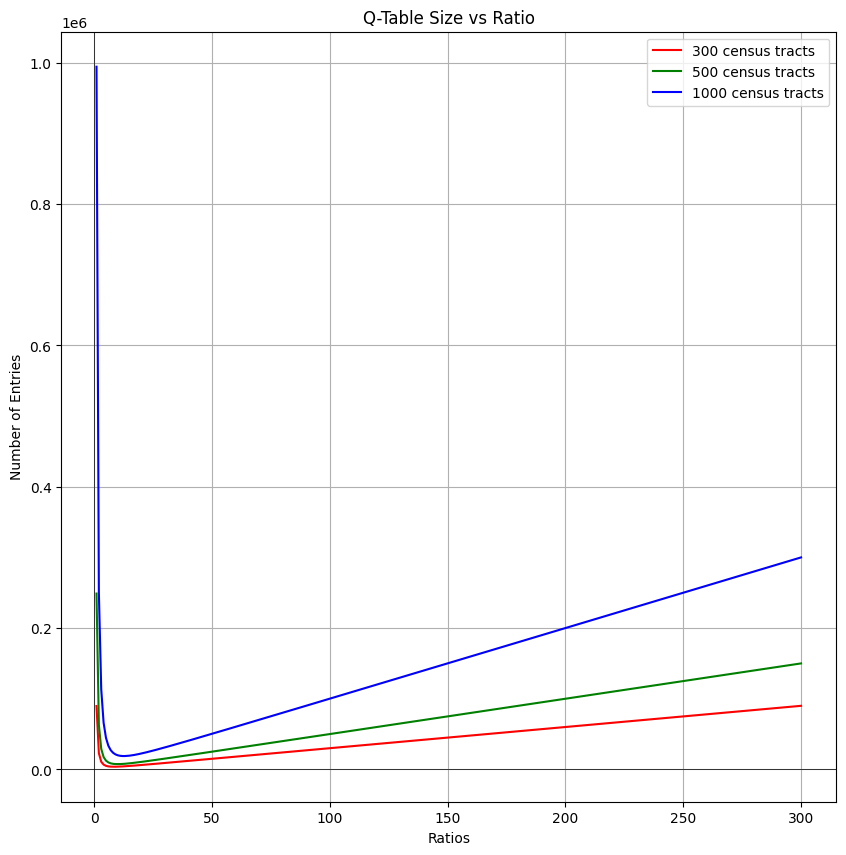

In [ ]:

def curve_equation(x, ratios):
  ret = []
  for ratio in ratios:
      ret.append((x/ratio)**2 + (x/ratio) * ratio**2)
  return ret

# Define the x values for the plot
ratios = np.linspace(0, 300, 300)

# Define different ratios to plot
x_values = [300, 500, 1000]
colors = ['red', 'green', 'blue']

# Plot the curves
plt.figure(figsize=(10, 10))

for x, color in zip(x_values, colors):
    y_values = curve_equation(x, ratios)
    plt.plot(ratios, y_values, label=f'{x} census tracts', color=color)




# Add labels, legend, and grid
plt.title("Q-Table Size vs Ratio")
plt.xlabel("Ratios")
plt.ylabel("Number of Entries")
plt.legend()
plt.grid(True)
plt.axhline(0, color='black', linewidth=0.5)
plt.axvline(0, color='black', linewidth=0.5)

# Show the plot
plt.show()

red
[90300.0, 23025.692956706225, 10857.42039029328, 6799.812907463948, 5084.775543239235, 4291.1098859818685, 3932.2543079183706, 3805.075030475886, 3812.5657903340525, 3903.6486895456883, 4049.351306112714, 4232.246416269395, 4441.34099099141, 4669.422598587432, 4911.600089167078, 5164.46155355041, 5425.5682340311505, 5693.139497513868, 5965.850670475258, 6242.699783888018, 6522.917634919518, 6805.905789640185, 7091.193029270586, 7378.4042258355985, 7667.237752668417, 7957.448856144938, 8248.837256287192, 8541.237790328332, 8834.513274762952, 9128.549004463977, 9423.248473420641, 9718.530016604514, 10014.324153138365, 10310.571468247485, 10607.220912648021, 10904.228427928965, 11201.55582841786, 11499.169886260534, 11797.041578576156, 12095.145464686386, 12393.45916835416, 12691.962945273175, 12990.639320135382, 13289.472780772388, 13588.449519339047, 13887.557212448453, 14186.784833700021, 14486.122493258968, 14785.561300116384, 15085.093243437888, 15384.711090036331, 15684.40829551

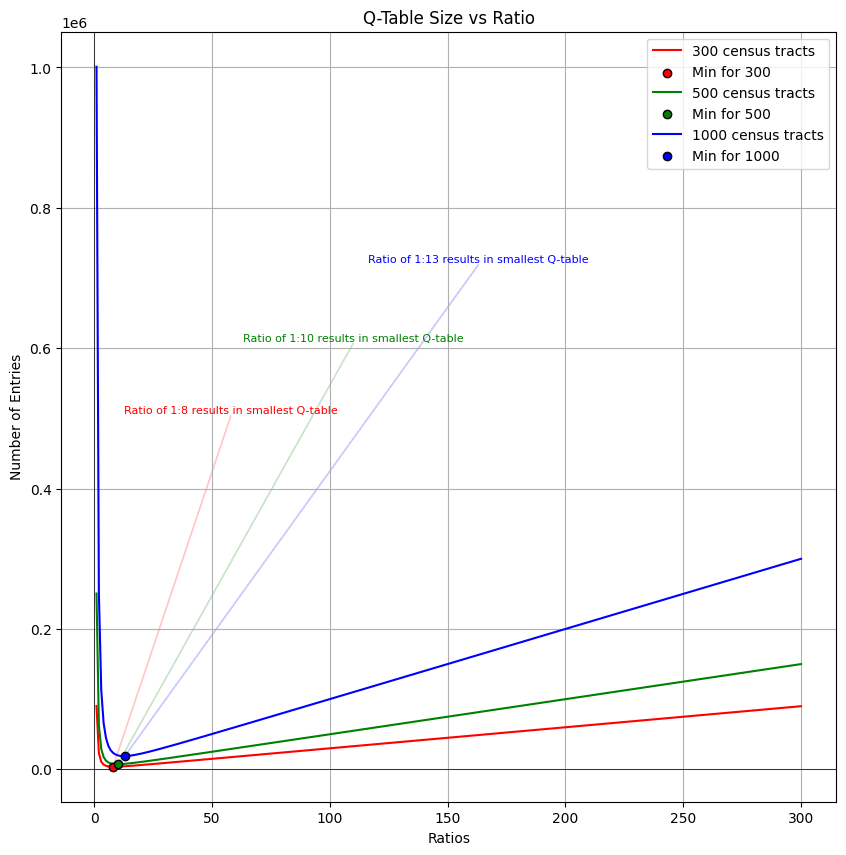

In [ ]:
def curve_equation(x, ratios):
    ret = []
    for ratio in ratios:
        ret.append((x / ratio) ** 2 + (x / ratio) * ratio ** 2)
    return ret

# Define the x values for the plot
ratios = np.linspace(1, 300, 299)  # Avoid division by zero with 0.1

# Define different ratios to plot
x_values = [300, 500, 1000]
colors = ['red', 'green', 'blue']

# Plot the curves
y_offsets = [500000, 600000, 700000]
x_offsets = [50, 100, 150]
plt.figure(figsize=(10, 10))

for x, color, offset, xoffset in zip(x_values, colors, y_offsets, x_offsets):
    y_values = curve_equation(x, ratios)
    plt.plot(ratios, y_values, label=f'{x} census tracts', color=color)
    print(color)
    print(y_values)
    # Find the minimum y value and its corresponding ratio
    min_y = min(y_values)
    min_index = y_values.index(min_y)
    min_ratio = ratios[min_index]

    plt.scatter(min_ratio, min_y, color=color, edgecolor='black', zorder=5, label=f'Min for {x}')

    # Annotate the minimum point with offset
    plt.text(min_ratio + xoffset, min_y + offset, f"Ratio of 1:{int(min_ratio)} results in smallest Q-table",
             fontsize=8, color=color, ha='center', va='bottom')

    # Add a leader line to the point
    plt.arrow(min_ratio + xoffset, min_y + offset - 10, -xoffset, -offset + 10,
              head_width=5, head_length=10, fc=color, ec=color, alpha=.2)

# Add labels, legend, and grid
plt.title("Q-Table Size vs Ratio")
plt.xlabel("Ratios")
plt.ylabel("Number of Entries")
plt.legend()
plt.grid(True)
plt.axhline(0, color='black', linewidth=0.5)
plt.axvline(0, color='black', linewidth=0.5)

# Show the plot
plt.show()

print()

In [ ]:
import pandas as pd

data = {
    "Columbus": pd.DataFrame({
        "Metric": ["Success Rate (%)", "Total Distance (km)", "Mean Time (s)", "SD Time (s)", "Avg. Hops", "CDV + PDV"],
        "1:5 Ratio (R)": [96.1, 256880, 1585.79, 751.18, 3.25, 8024],
        "1:5 Ratio (B1)": [98.6, 272028.7, 1426.7, 436.9, 3.0, 8074.3],
        "1:5 Ratio (B2)": [97.5, 274916, 1506.54, 601.02, 3.22, 8109],
        "1:10 Ratio (R)": [97.3, 262557, 1559.46, 710.86, 3.17, 7855],
        "1:10 Ratio (B1)": [98.6, 272028.7, 1426.7, 436.9, 3.0, 8074.3],
        "1:10 Ratio (B2)": [98.3, 276800, 1494.04, 595.05, 3.15, 7992],
        "1:15 Ratio (R)": [95.2, 255209, 1618.55, 819.32, 3.27, 8036],
        "1:15 Ratio (B1)": [98.6, 272028.7, 1426.7, 436.9, 3.0, 8074.3],
        "1:15 Ratio (B2)": [97.1, 277001, 1533.98, 664.10, 3.22, 8122]
    }),
    "Chicago": pd.DataFrame({
        "Metric": ["Success Rate (%)", "Total Distance (km)", "Mean Time (s)", "SD Time (s)", "Avg. Hops", "CDV + PDV"],
        "1:10 Ratio (R)": [86.5, 183507, 1632.76, 936.56, 3.58, 9754],
        "1:10 Ratio (B1)": [95.2, 233801.0, 1411.6, 581.7, 3.0, 9902.0],
        "1:10 Ratio (B2)": [91.3, 230781, 1547.88, 774.60, 3.54, 9861],
        "1:15 Ratio (R)": [83.6, 175340, 1645.45, 1002.24, 3.62, 9932],
        "1:15 Ratio (B1)": [95.2, 233801.0, 1411.6, 581.7, 3.0, 9902.0],
        "1:15 Ratio (B2)": [90.4, 231675, 1558.75, 807.76, 3.55, 9393]
    }),
    "Chicago Subset": pd.DataFrame({
        "Metric": ["Success Rate (%)", "Total Distance (km)", "Mean Time (s)", "SD Time (s)", "Avg. Hops", "CDV + PDV"],
        "1:5 Ratio (R)": [96.2, 40549, 507.24, 266.46, 3.64, 2264],
        "1:5 Ratio (B1)": [100.0, 42568.0, 350.2, 116.1, 3.0, 2465.0],
        "1:5 Ratio (B2)": [99.1, 48700, 426.40, 210.82, 3.51, 2397],
        "1:10 Ratio (R)": [95.4, 35396, 549.33, 273.65, 3.80, 2825],
        "1:10 Ratio (B1)": [100.0, 42568.0, 350.2, 116.1, 3.0, 2465.0],
        "1:10 Ratio (B2)": [99.5, 47915, 454.00, 227.37, 3.60, 2504],
        "1:15 Ratio (R)": [95.4, 35418, 547.18, 272.83, 3.79, 2796],
        "1:15 Ratio (B1)": [100.0, 42568.0, 350.2, 116.1, 3.0, 2465.0],
        "1:15 Ratio (B2)": [99.5, 47703, 451.09, 226.54, 3.59, 2494],
        "1:31 Ratio (R)": [99.8, 28718, 423.68, 141.36, 3.23, 2020],
        "1:31 Ratio (B1)": [100.0, 42568.0, 350.2, 116.1, 3.0, 2465.0],
        "1:31 Ratio (B2)": [100.0, 42498, 349.5, 116.2, 3.0, 2107]
    })
}

# Example usage:
for city, df in data.items():
    print(f"{city} DataFrame:")
    print(df, "\n")

def calculate_improvements(df):
    improvements = []
    for _, row in df.iterrows():
        metric = row["Metric"]
        base_value = row["1:5 Ratio (B1)"] if "1:5 Ratio (B1)" in df.columns else row["1:10 Ratio (B1)"]
        for col in df.columns[1:]:  # Skip "Metric" column
            if col.endswith("(B1)"):  # Skip baseline itself
                continue
            value = row[col]
            improvement = value - base_value
            percent_improvement = (improvement / base_value) * 100 if base_value != 0 else 0
            improvements.append([metric, col, improvement, percent_improvement])
    return pd.DataFrame(improvements, columns=["Metric", "Ratio", "Improvement", "Percent Improvement"])


chicago_subset_filtered = data["Chicago Subset"].drop(columns=["1:31 Ratio (R)", "1:31 Ratio (B1)", "1:31 Ratio (B2)"], errors="ignore")
# Compute improvements for each city
columbus_improvements = calculate_improvements(data["Columbus"])
chicago_improvements = calculate_improvements(data["Chicago"])
chicago_subset_improvements = calculate_improvements(data["Chicago Subset"])

#columbus_improvements, chicago_improvements, chicago_subset_improvements

# Create DataFrames
df_columbus = pd.DataFrame(columbus_improvements)
df_chicago = pd.DataFrame(chicago_improvements)
df_chicago_subset = pd.DataFrame(chicago_subset_improvements)

# Filter out rows where Ratio is '1:31' or contains 'B2'
df_columbus = df_columbus[~df_columbus['Ratio'].str.contains("1:31|B2")]
df_chicago = df_chicago[~df_chicago['Ratio'].str.contains("1:31|B2")]
df_chicago_subset = df_chicago_subset[~df_chicago_subset['Ratio'].str.contains("1:31|B2")]


# Assuming the processed DataFrames from earlier are:
# df_chicago, df_columbus, df_chicago_subset

# Define the three variables to use
selected_metrics = ["Success Rate (%)", "Total Distance (km)", "Mean Time (s)", "SD Time (s)", "Avg. Hops", "CDV + PDV"]

# Function to compute averages per city
def compute_city_averages(df, city_name):
    city_averages = df[df["Metric"].isin(selected_metrics)].groupby(["Ratio", "Metric"])[["Improvement", "Percent Improvement"]].mean().reset_index()
    city_averages["City"] = city_name

    # Compute average for each metric across all ratios
    avg_per_metric = city_averages.groupby(["Metric"])[["Improvement", "Percent Improvement"]].mean().reset_index()
    avg_per_metric["Ratio"] = "AVERAGE"
    avg_per_metric["City"] = city_name

    return pd.concat([city_averages, avg_per_metric], ignore_index=True)

# Compute averages for each dataset
chicago_avg = compute_city_averages(df_chicago, "Chicago")
columbus_avg = compute_city_averages(df_columbus, "Columbus")
chicago_subset_avg = compute_city_averages(df_chicago_subset, "Chicago Subset")

# Combine all city-specific results
all_cities_combined = pd.concat([chicago_avg, columbus_avg, chicago_subset_avg], ignore_index=True)

# Compute the final average across all cities
final_summary = all_cities_combined.groupby(["Ratio", "Metric"])[["Improvement", "Percent Improvement"]].mean().reset_index()
final_summary["City"] = "FINAL AVERAGE"

# Combine everything
final_result = pd.concat([all_cities_combined, final_summary], ignore_index=True)


pd.set_option("display.max_rows", None)  # Show all rows
pd.set_option("display.max_columns", None)  # Show all columns
pd.set_option("display.width", 1000)  # Set a wide display width
pd.set_option("display.colheader_justify", "left")  # Align headers to the left
pd.set_option("display.float_format", "{:.2f}".format)  # Format floats to 2 decimal places

# Display the formatted output
print(final_result)

# Save to CSV (optional)



Columbus DataFrame:
                Metric  1:5 Ratio (R)  1:5 Ratio (B1)  1:5 Ratio (B2)  \
0     Success Rate (%)          96.10            98.6           97.50   
1  Total Distance (km)      256880.00        272028.7       274916.00   
2        Mean Time (s)        1585.79          1426.7         1506.54   
3          SD Time (s)         751.18           436.9          601.02   
4            Avg. Hops           3.25             3.0            3.22   
5            CDV + PDV        8024.00          8074.3         8109.00   

   1:10 Ratio (R)  1:10 Ratio (B1)  1:10 Ratio (B2)  1:15 Ratio (R)  \
0           97.30             98.6            98.30           95.20   
1       262557.00         272028.7        276800.00       255209.00   
2         1559.46           1426.7          1494.04         1618.55   
3          710.86            436.9           595.05          819.32   
4            3.17              3.0             3.15            3.27   
5         7855.00           8074.3        

In [ ]:
import pandas as pd

data = {
    "Columbus": pd.DataFrame({
        "Metric": ["Success Rate (%)", "Total Distance (km)", "Mean Time (s)", "SD Time (s)", "Avg. Hops", "CDV + PDV"],
        "1:5 Ratio (R)": [96.1, 256880, 1585.79, 751.18, 3.25, 8024],
        "1:5 Ratio (B1)": [98.6, 272028.7, 1426.7, 436.9, 3.0, 8074.3],
        "1:5 Ratio (B2)": [97.5, 274916, 1506.54, 601.02, 3.22, 8109],
        "1:10 Ratio (R)": [97.3, 262557, 1559.46, 710.86, 3.17, 7855],
        "1:10 Ratio (B1)": [98.6, 272028.7, 1426.7, 436.9, 3.0, 8074.3],
        "1:10 Ratio (B2)": [98.3, 276800, 1494.04, 595.05, 3.15, 7992],
        "1:15 Ratio (R)": [95.2, 255209, 1618.55, 819.32, 3.27, 8036],
        "1:15 Ratio (B1)": [98.6, 272028.7, 1426.7, 436.9, 3.0, 8074.3],
        "1:15 Ratio (B2)": [97.1, 277001, 1533.98, 664.10, 3.22, 8122]
    }),
    "Chicago": pd.DataFrame({
        "Metric": ["Success Rate (%)", "Total Distance (km)", "Mean Time (s)", "SD Time (s)", "Avg. Hops", "CDV + PDV"],
        "1:10 Ratio (R)": [86.5, 183507, 1632.76, 936.56, 3.58, 9754],
        "1:10 Ratio (B1)": [95.2, 233801.0, 1411.6, 581.7, 3.0, 9902.0],
        "1:10 Ratio (B2)": [91.3, 230781, 1547.88, 774.60, 3.54, 9861],
        "1:15 Ratio (R)": [83.6, 175340, 1645.45, 1002.24, 3.62, 9932],
        "1:15 Ratio (B1)": [95.2, 233801.0, 1411.6, 581.7, 3.0, 9902.0],
        "1:15 Ratio (B2)": [90.4, 231675, 1558.75, 807.76, 3.55, 9393]
    }),
    "Chicago Subset": pd.DataFrame({
        "Metric": ["Success Rate (%)", "Total Distance (km)", "Mean Time (s)", "SD Time (s)", "Avg. Hops", "CDV + PDV"],
        "1:5 Ratio (R)": [96.2, 40549, 507.24, 266.46, 3.64, 2264],
        "1:5 Ratio (B1)": [100.0, 42568.0, 350.2, 116.1, 3.0, 2465.0],
        "1:5 Ratio (B2)": [99.1, 48700, 426.40, 210.82, 3.51, 2397],
        "1:10 Ratio (R)": [95.4, 35396, 549.33, 273.65, 3.80, 2825],
        "1:10 Ratio (B1)": [100.0, 42568.0, 350.2, 116.1, 3.0, 2465.0],
        "1:10 Ratio (B2)": [99.5, 47915, 454.00, 227.37, 3.60, 2504],
        "1:15 Ratio (R)": [95.4, 35418, 547.18, 272.83, 3.79, 2796],
        "1:15 Ratio (B1)": [100.0, 42568.0, 350.2, 116.1, 3.0, 2465.0],
        "1:15 Ratio (B2)": [99.5, 47703, 451.09, 226.54, 3.59, 2494],
        "1:31 Ratio (R)": [99.8, 28718, 423.68, 141.36, 3.23, 2020],
        "1:31 Ratio (B1)": [100.0, 42568.0, 350.2, 116.1, 3.0, 2465.0],
        "1:31 Ratio (B2)": [100.0, 42498, 349.5, 116.2, 3.0, 2107]
    })
}

# Function to calculate improvements
def calculate_improvements(df):
    improvements = []
    for _, row in df.iterrows():
        metric = row["Metric"]
        base_value = row["1:5 Ratio (B2)"] if "1:5 Ratio (B2)" in df.columns else row["1:10 Ratio (B2)"]
        for col in df.columns[1:]:  # Skip "Metric" column
            if col.endswith("(B2)"):  # Skip baseline itself
                continue
            value = row[col]
            improvement = value - base_value
            percent_improvement = (improvement / base_value) * 100 if base_value != 0 else 0
            improvements.append([metric, col, improvement, percent_improvement])
    return pd.DataFrame(improvements, columns=["Metric", "Ratio", "Improvement", "Percent Improvement"])

# Compute improvements for each city
columbus_improvements = calculate_improvements(data["Columbus"])
chicago_improvements = calculate_improvements(data["Chicago"])
chicago_subset_improvements = calculate_improvements(data["Chicago Subset"])

# Create DataFrames for each city
df_columbus = pd.DataFrame(columbus_improvements)
df_chicago = pd.DataFrame(chicago_improvements)
df_chicago_subset = pd.DataFrame(chicago_subset_improvements)

# Filter out rows where Ratio is '1:31' or contains 'B2'
df_columbus = df_columbus[~df_columbus['Ratio'].str.contains("1:31|B1")]
df_chicago = df_chicago[~df_chicago['Ratio'].str.contains("1:31|B1")]
df_chicago_subset = df_chicago_subset[~df_chicago_subset['Ratio'].str.contains("1:31|B1")]

# Define the metrics to use
selected_metrics = ["Success Rate (%)", "Total Distance (km)", "Mean Time (s)", "SD Time (s)", "Avg. Hops", "CDV + PDV"]

# Function to compute averages per city
def compute_city_averages(df, city_name):
    city_averages = df[df["Metric"].isin(selected_metrics)].groupby(["Ratio", "Metric"])[["Improvement", "Percent Improvement"]].mean().reset_index()
    city_averages["City"] = city_name

    # Compute average for each metric across all ratios
    avg_per_metric = city_averages.groupby(["Metric"])[["Improvement", "Percent Improvement"]].mean().reset_index()
    avg_per_metric["Ratio"] = "AVERAGE"
    avg_per_metric["City"] = city_name

    return pd.concat([city_averages, avg_per_metric], ignore_index=True)

# Compute averages for each dataset
chicago_avg = compute_city_averages(df_chicago, "Chicago")
columbus_avg = compute_city_averages(df_columbus, "Columbus")
chicago_subset_avg = compute_city_averages(df_chicago_subset, "Chicago Subset")

# Combine all city-specific results
all_cities_combined = pd.concat([chicago_avg, columbus_avg, chicago_subset_avg], ignore_index=True)

# Compute the final average across all cities
final_summary = all_cities_combined.groupby(["Ratio", "Metric"])[["Improvement", "Percent Improvement"]].mean().reset_index()
final_summary["City"] = "FINAL AVERAGE"

# Combine everything
final_result = pd.concat([all_cities_combined, final_summary], ignore_index=True)

# Display formatted output
pd.set_option("display.max_rows", None)  # Show all rows
pd.set_option("display.max_columns", None)  # Show all columns
pd.set_option("display.width", 1000)  # Set a wide display width
pd.set_option("display.colheader_justify", "left")  # Align headers to the left
pd.set_option("display.float_format", "{:.2f}".format)  # Format floats to 2 decimal places

# Print the final results
print(final_result)


   Ratio           Metric                Improvement  Percent Improvement City           
0   1:10 Ratio (R)            Avg. Hops      0.04      1.13                       Chicago
1   1:10 Ratio (R)            CDV + PDV   -107.00     -1.09                       Chicago
2   1:10 Ratio (R)        Mean Time (s)     84.88      5.48                       Chicago
3   1:10 Ratio (R)          SD Time (s)    161.96     20.91                       Chicago
4   1:10 Ratio (R)     Success Rate (%)     -4.80     -5.26                       Chicago
5   1:10 Ratio (R)  Total Distance (km) -47274.00    -20.48                       Chicago
6   1:15 Ratio (R)            Avg. Hops      0.08      2.26                       Chicago
7   1:15 Ratio (R)            CDV + PDV     71.00      0.72                       Chicago
8   1:15 Ratio (R)        Mean Time (s)     97.57      6.30                       Chicago
9   1:15 Ratio (R)          SD Time (s)    227.64     29.39                       Chicago
10  1:15 R

In [ ]:
import pandas as pd

# Define the data excluding 1:31
data = {
    "Dataset": ["Columbus 1:5", "Columbus 1:10", "Columbus 1:15",
                "Chicago 1:10", "Chicago 1:15", "Chicago Subset 1:5",
                "Chicago Subset 1:10", "Chicago Subset 1:15"],
    "Mean Time (R)": [1585.79, 1559.46, 1618.55, 1632.76, 1645.45, 507.24, 549.33, 547.18],
    "Mean Time (B1)": [1424.99, 1426.77, 1428.21, 1416.62, 1406.64, 349.50, 350.43, 350.52],
    "Mean Time (B2)": [1506.54, 1494.04, 1533.98, 1547.88, 1558.75, 426.40, 454.00, 451.09],
}

# Convert to DataFrame
df = pd.DataFrame(data)

# Compute Actual and Percent Increase for B1 and B2 vs. R
df["Actual Increase (B1-R)"] = df["Mean Time (B1)"] - df["Mean Time (R)"]
df["Percent Increase (B1-R)"] = (df["Actual Increase (B1-R)"] / df["Mean Time (R)"]) * 100

df["Actual Increase (B2-R)"] = df["Mean Time (B2)"] - df["Mean Time (R)"]
df["Percent Increase (B2-R)"] = (df["Actual Increase (B2-R)"] / df["Mean Time (R)"]) * 100

# Group by the city to calculate the average per city
df['City'] = df['Dataset'].apply(lambda x: 'Columbus' if 'Columbus' in x else 'Chicago Subset' if 'Chicago Subset' in x else 'Chicago')

# Calculate averages by city
city_averages = df.groupby('City').agg({
    'Actual Increase (B1-R)': 'mean',
    'Percent Increase (B1-R)': 'mean',
    'Actual Increase (B2-R)': 'mean',
    'Percent Increase (B2-R)': 'mean'
}).reset_index()

# Calculate total averages
total_averages = df[['Actual Increase (B1-R)', 'Percent Increase (B1-R)', 'Actual Increase (B2-R)', 'Percent Increase (B2-R)']].mean()

# Display the results
df, city_averages, total_averages

(  Dataset               Mean Time (R)  Mean Time (B1)  Mean Time (B2)  Actual Increase (B1-R)  Percent Increase (B1-R)  Actual Increase (B2-R)  Percent Increase (B2-R) City           
 0         Columbus 1:5 1585.79        1424.99         1506.54         -160.80                 -10.14                   -79.25                   -5.00                          Columbus
 1        Columbus 1:10 1559.46        1426.77         1494.04         -132.69                  -8.51                   -65.42                   -4.20                          Columbus
 2        Columbus 1:15 1618.55        1428.21         1533.98         -190.34                 -11.76                   -84.57                   -5.23                          Columbus
 3         Chicago 1:10 1632.76        1416.62         1547.88         -216.14                 -13.24                   -84.88                   -5.20                           Chicago
 4         Chicago 1:15 1645.45        1406.64         1558.75         -238

In [ ]:
import pandas as pd

# Creating DataFrames based on the provided LaTeX tables

# Columbus Data
columbus_data = {
    "Ratio": ["1:5", "1:10", "1:15"],
    "R_Distance": [256880, 262557, 255209],
    "B1_Distance": [271221, 273122, 271743],
    "B2_Distance": [274916, 276800, 277001]
}
columbus_df = pd.DataFrame(columbus_data)

# Chicago Data
chicago_data = {
    "Ratio": ["1:10", "1:15"],
    "R_Distance": [183507, 175340],
    "B1_Distance": [234285, 233317],
    "B2_Distance": [230781, 231675]
}
chicago_df = pd.DataFrame(chicago_data)

# Chicago Subset Data
chicago_subset_data = {
    "Ratio": ["1:5", "1:10", "1:15"],
    "R_Distance": [40549, 35396, 35418],
    "B1_Distance": [42492, 42568, 42644],
    "B2_Distance": [48700, 47915, 47703]
}
chicago_subset_df = pd.DataFrame(chicago_subset_data)

# Combine all data
all_dfs = [columbus_df, chicago_df, chicago_subset_df]
combined_df = pd.concat(all_dfs, ignore_index=True)

# Calculate total distance saved and percentage saved
combined_df["R_vs_B1_Saved"] = combined_df["B1_Distance"] - combined_df["R_Distance"]
combined_df["R_vs_B1_Percent"] = (combined_df["R_vs_B1_Saved"] / combined_df["B1_Distance"]) * 100

combined_df["R_vs_B2_Saved"] = combined_df["B2_Distance"] - combined_df["R_Distance"]
combined_df["R_vs_B2_Percent"] = (combined_df["R_vs_B2_Saved"] / combined_df["B2_Distance"]) * 100

# Summarize total savings across all ratios
total_savings_b1 = combined_df["R_vs_B1_Saved"].sum()/3
total_percent_b1 = (total_savings_b1 / (combined_df["B1_Distance"].sum()/3)) * 100

total_savings_b2 = combined_df["R_vs_B2_Saved"].sum()/3
total_percent_b2 = (total_savings_b2 / (combined_df["B2_Distance"].sum()/3)) * 100

# Display results
combined_df, total_savings_b1, total_percent_b1, total_savings_b2, total_percent_b2

(  Ratio  R_Distance  B1_Distance  B2_Distance  R_vs_B1_Saved  R_vs_B1_Percent  \
 0   1:5      256880       271221       274916          14341         5.287570   
 1  1:10      262557       273122       276800          10565         3.868235   
 2  1:15      255209       271743       277001          16534         6.084425   
 3  1:10      183507       234285       230781          50778        21.673603   
 4  1:15      175340       233317       231675          57977        24.849025   
 5   1:5       40549        42492        48700           1943         4.572625   
 6  1:10       35396        42568        47915           7172        16.848337   
 7  1:15       35418        42644        47703           7226        16.944939   
 
    R_vs_B2_Saved  R_vs_B2_Percent  
 0          18036         6.560549  
 1          14243         5.145592  
 2          21792         7.867120  
 3          47274        20.484355  
 4          56335        24.316391  
 5           8151        16.737166  
 

In [ ]:
import pandas as pd

# Assuming df is your DataFrame containing the data

# Exclude Chicago Subset 1:31 Ratio
filtered_df = df[~((df["City"] == "Chicago Subset") & (df["Ratio"] == "1:31 Ratio (DeliverAI)"))]

# Calculate total distance saved
total_distance_saved_r_b1 = (filtered_df["B1"] - filtered_df["R"]).sum()
total_distance_saved_r_b2 = (filtered_df["B2"] - filtered_df["R"]).sum()

# Calculate percentage saved
percent_saved_r_b1 = (total_distance_saved_r_b1 / filtered_df["B1"].sum()) * 100
percent_saved_r_b2 = (total_distance_saved_r_b2 / filtered_df["B2"].sum()) * 100

# Print results
print(f"Total Distance Saved (R -> B1): {total_distance_saved_r_b1} km")
print(f"Percentage Saved (R -> B1): {percent_saved_r_b1:.2f}%")
print(f"Total Distance Saved (R -> B2): {total_distance_saved_r_b2} km")
print(f"Percentage Saved (R -> B2): {percent_saved_r_b2:.2f}%")

KeyError: 'City'